<a href="https://colab.research.google.com/github/annchirackal/Tensorflow-Developer-Certification/blob/main/8_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alongside visulatising the model results as much as possible, there is a handful evalution methods and metrics:
*   Accuracy
*   Precision or specificity
*   Recall
*   F1 - score
*   Confusion Matrix
*   Classification report


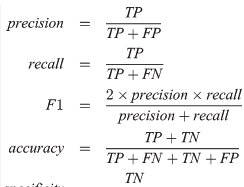





In [11]:
#Lets create a quick toy dataset to play with.
from sklearn.datasets import make_circles
n_samples=100
x,y=make_circles(n_samples,noise=0.03,random_state=42)
#Split the dataset into traning and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Model Creation
import tensorflow as tf
#set random seed
tf.random.set_seed=42
#Model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
#Complite the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
              metrics=["accuracy"])

#fit the model
history=model.fit(X_train,y_train,epochs=500,verbose=0)


Lets Try different evalution metrics on our model

In [12]:
#Check accuracy of the model
loss,accuracy = model.evaluate(X_test,y_test)
print("model accuracy:{}".format(accuracy))
print("model loss    :{}".format(loss))

1/1 [==============================] - 0s 108ms/step - loss: 0.4433 - accuracy: 0.7500
model accuracy:0.75
model loss    :0.44328564405441284


Model is 75% accuracy. In order to analyse more and to see where the model is going wrong, lets build confution matrix

In [20]:
from scipy.sparse.data import matrix
from sklearn.metrics import confusion_matrix

 #lets use scikit learn confusion matrix function to build the confusion matrix
y_pred= tf.round(model.predict(X_test))
confusion_matrix(y_true=y_test,y_pred=(y_pred))

1/1 [==============================] - 0s 16ms/step


array([[8, 0],
       [5, 7]])

This is confusing. Lets make it more readable

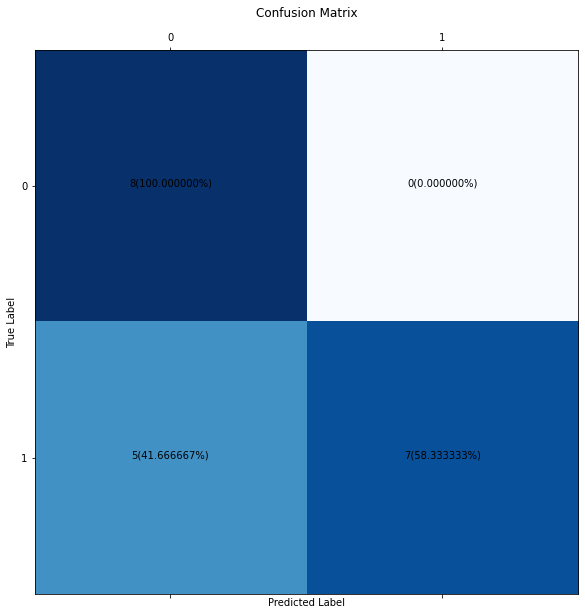

In [30]:
from prompt_toolkit.layout.containers import HorizontalAlign
from pandas.core.dtypes.common import classes
import itertools
import matplotlib.pyplot as plt

figsize =(10,10)
cm=confusion_matrix(y_true=y_test,y_pred=y_pred)
cm_norm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis ] # normalise the condusion matrix
n_classes = cm.shape[0]

fig,ax= plt.subplots(figsize=figsize)
cax=ax.matshow(cm,cmap=plt.cm.Blues)

classes=False

if classes:
  labels=classes
else:
  labels=np.arange(cm.shape[0])

#Lablel axex
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)
#set threshold for diffrent colors

#Visulase the confusion matrix
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]}({cm_norm[i,j]*100:1f}%)",
           horizontalalignment="center",
           color="black")